### How do we describe qubits?
A qubit is a unit other than what we are used to. It differs from an ordinary bit in that it has no fixed value, but according to the rules of quantum mechanics, it is in an intermediate state, called superposition, between 0 and 1 (like Schrödinger's cat). Instead of selecting a value of 0 or 1, there is a probability of both being in the state of both variables. Only when measuring, the qubit can assume one of these two values. 

We can represent the qubits as follows:
$$
\big|0\rangle
$$
$$
\big|1\rangle
$$

As we mentioned before, general qubit state can be the superposition of these two mathematical expressions. Let's unpack the weird  $ig|$  and  $\rangle$ . Their job is essentially just to remind us that we are talking about the vectors that represent qubit states labelled  0  and  1. 

Vectors have the following values:
$$
\big|0\rangle= 
\begin{bmatrix}
1  \\
0  \\
\end{bmatrix}
$$
$$
\big|1\rangle= 
\begin{bmatrix}
0  \\
1  \\
\end{bmatrix}
$$

If you are not familiar with vectors, you can essentially just think of them as lists of numbers which we manipulate using certain rules. If you want to learn more about vectors and qubits, please visit the [official Qiskit website](https://qiskit.org/textbook/ch-states/representing-qubit-states.html).

Another way to represent the state of a qubit $\big|q\rangle$ is this pattern: $$\big|q\rangle=\alpha\big|0\rangle+\beta\big|1\rangle,$$

where $\alpha$ and $\beta$ are probability amplitudes and can in general both be complex numbers. 

### About Bloch Sphere...
In quantum mechanics and computer science, the Bloch sphere is a geometric representation of a qubit's state. We can generate a model of the sphere with a simple qiskit command.  Everything is based on the formula: 
$$
\big|q\rangle=cos \frac{\theta}{2} \big|0\rangle + e^{i\phi}sin\frac{\theta}{2}\big|1\rangle
$$

At first glance, this mathematical formula is quite difficult to understand. [This](https://qiskit.org/textbook/ch-states/representing-qubit-states.html#3.1-Describing-the-Restricted-Qubit-State-) page shows how it was derived. If we interpret $\theta$ and $\phi$ as spherical coordinates (r = 1, since the magnitude of the qubit state is 1), we can plot any qubit state on the surface of a sphere, known as the Bloch sphere.

Summarizing, qubit state can be represented simply by any point on the Bloch sphere.

To represent points on a sphere it is easier to use spherical coordinates (Theta, Phi, R) instead of cartesian ones (x, y, z). The relations between them are given by these three formulas:
$$
x = r \cdot sin(a) \cdot cos(b)
$$
$$
y = r \cdot sin(a) \cdot sin(b)
$$
$$
z = r \cdot cos(a)
$$

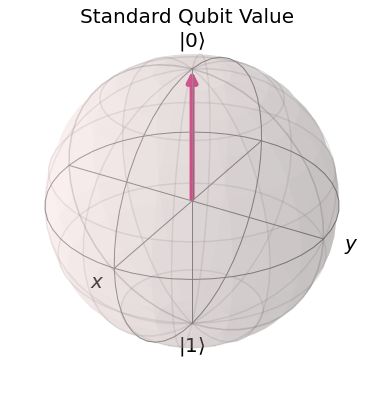

In [1]:
from qiskit.visualization import plot_bloch_vector
%matplotlib inline
plot_bloch_vector([0,0,1], title="Standard Qubit Value")

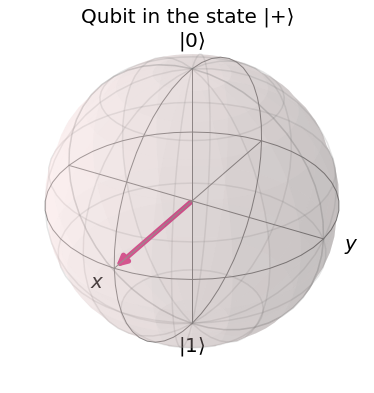

In [2]:
plot_bloch_vector([1,0,0], title="Qubit in the state |+⟩")

### Single qubit gates as matrices
So far, you can see that everything is based on mathematical formulas. It is no different with qubit gates. The operation of such a gate is based on the use of a matrix. In the case of one-qubit gates these are 2x2 matrices. The one-qubit gates discussed earlier are shown below:

### NOT Gate
This matrix gate looks like this:
$$
X= 
\begin{bmatrix}
0 & 1 \\
1 & 0 \\
\end{bmatrix}
$$
To see the effect a gate has on a qubit, we simply multiply the vector representing qubit's state by the matrix representing the gate. (If you don't know how to multiply matrices, click [here](https://www.mathsisfun.com/algebra/matrix-multiplying.html)):
$$ X\big|0\rangle= 
\begin{bmatrix}
0 & 1 \\
1 & 0 \\
\end{bmatrix}
\begin{bmatrix}
1\\
0\\
\end{bmatrix}=
\begin{bmatrix}
0\\
1\\
\end{bmatrix}
 = \big|1\rangle
$$
Below we will introduce qubit on a Bloch sphere using Qiskit. At the beginning we have to implement the necessary libraries:

In [3]:
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector

We do the same as in the previous section, but instead of drawing our qubit, we will immediately generate it on the Bloch sphere.

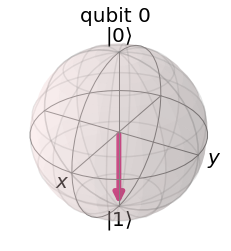

In [4]:
qcA = QuantumCircuit(1)
qcA.x(0)
backend = Aer.get_backend('statevector_simulator')
out = execute(qcA,backend).result().get_statevector()
plot_bloch_multivector(out)

### Hadamard Gate
The Hadamard gate acts on a single qubit. By its application a measurement will have equal probabilities to become 1 or 0 (i.e. creates a superposition). The matrix by which we multiply the qubit is:
$$
H={\frac{1}{\sqrt{2}}}
\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix}
$$
Below we present the action that is used in a given qubit:
$$
H\big|0\rangle=\frac{\big|0\rangle+\big|1\rangle}{\sqrt{2}}=\big|+\rangle
$$
$$
H\big|1\rangle=\frac{\big|0\rangle-\big|1\rangle}{\sqrt{2}}=\big|-\rangle
$$
You've probably noticed the plus and minus. We call these the “ket plus” and “ket minus” states, and write them $\big|+\rangle$ and $\big|-\rangle$.

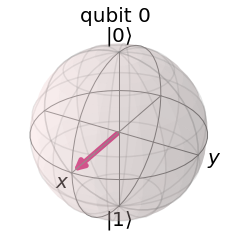

In [5]:
qcB = QuantumCircuit(1)
qcB.h(0)
backend = Aer.get_backend('statevector_simulator')
out = execute(qcB,backend).result().get_statevector()
plot_bloch_multivector(out)

Gates are described as rotations around X, Y or Z, by various angles. For example, in case of Hadamard gate, this is the rotation by 180 degrees around an axis located in the middle between X and Z. By representing it this way it is evident that applying H twice does not affect this will be 360 degrees rotation.